In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:

file_path = "/content/archive (2).zipv"

df = pd.read_csv('/content/archive (2).csv')

print(df.head())
print(df.info())


  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  3

In [ ]:
# Target variable
y = df["Selling_Price"]   # or "Price" depending on dataset

# Feature variables
X = df.drop("Selling_Price", axis=1)


In [ ]:
categorical_features = X.select_dtypes(include=["object"]).columns
numerical_features = X.select_dtypes(include=["int64", "float64"]).columns


In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("num", "passthrough", numerical_features)
    ]
)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission'], dtype='object')),
                                                 ('num', 'passthrough',
                                                  Index(['Year', 'Present_Price', 'Driven_kms', 'Owner'], dtype='object'))])),
                ('regressor', LinearRegression())])

In [ ]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)



Mean Absolute Error: 1.0620115556259315
Root Mean Squared Error: 1.6361047801770503
R² Score: 0.8837954882646726


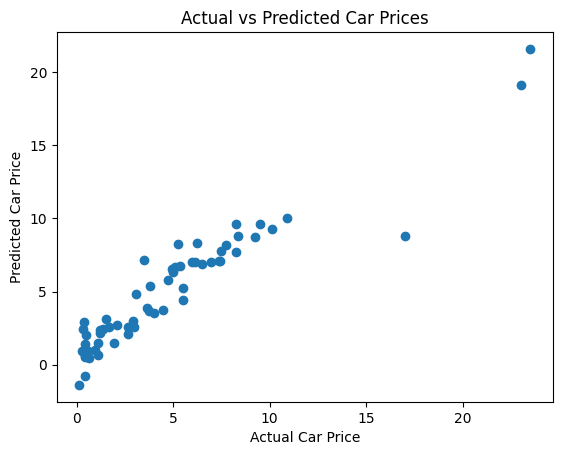

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Car Price")
plt.ylabel("Predicted Car Price")
plt.title("Actual vs Predicted Car Prices")
plt.show()


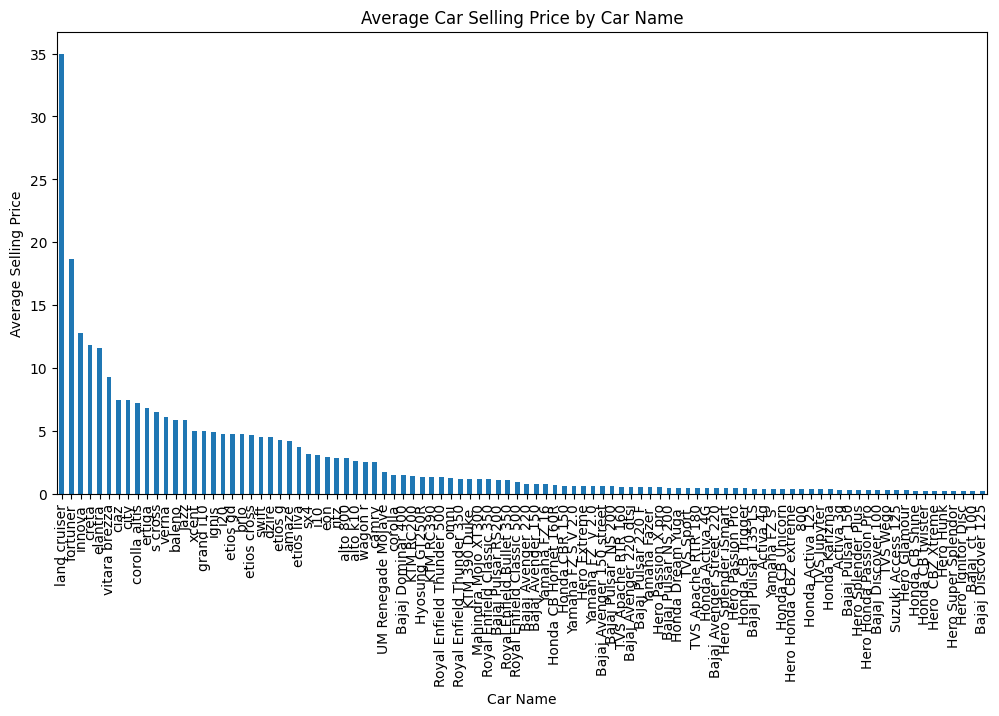

In [ ]:
brand_price = df.groupby("Car_Name")["Selling_Price"].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
brand_price.plot(kind="bar")
plt.xlabel("Car Name")
plt.ylabel("Average Selling Price")
plt.title("Average Car Selling Price by Car Name")
plt.xticks(rotation=90)
plt.show()

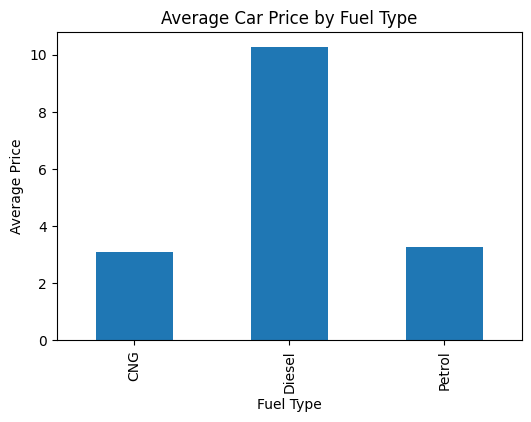

In [ ]:
fuel_price = df.groupby("Fuel_Type")["Selling_Price"].mean()

plt.figure(figsize=(6, 4))
fuel_price.plot(kind="bar")
plt.xlabel("Fuel Type")
plt.ylabel("Average Price")
plt.title("Average Car Price by Fuel Type")
plt.show()

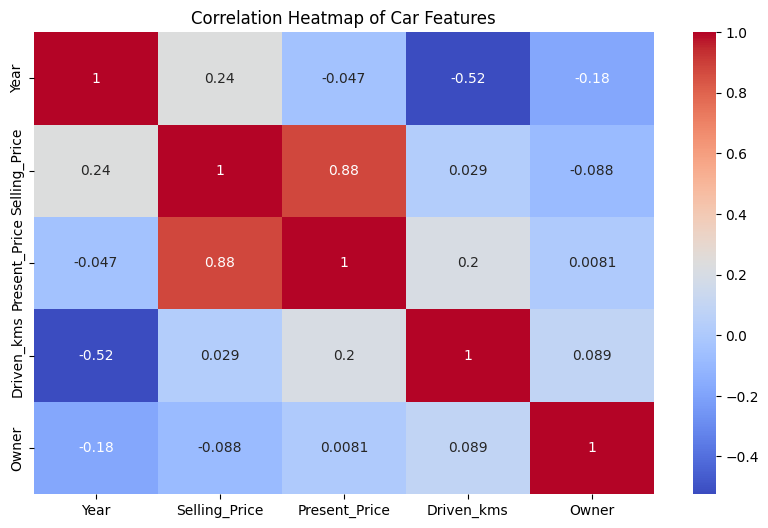

In [ ]:
# Select numerical features that actually exist in the DataFrame
numerical_df = df[[
    "Year",
    "Selling_Price",
    "Present_Price",
    "Driven_kms",
    "Owner"
]]

correlation_matrix = numerical_df.corr()

import seaborn as sns # Ensure seaborn is imported for heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Car Features")
plt.show()

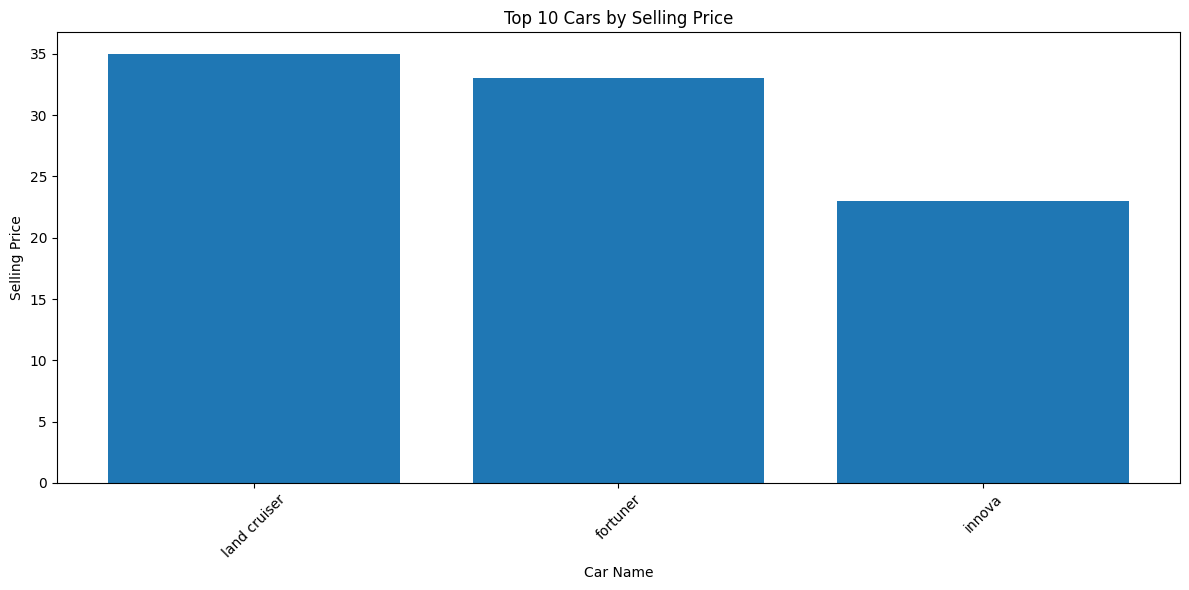

In [ ]:
# Select top 10 cars by price
top_cars = df.sort_values(by="Selling_Price", ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_cars["Car_Name"], top_cars["Selling_Price"])
plt.xlabel("Car Name")
plt.ylabel("Selling Price")
plt.title("Top 10 Cars by Selling Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

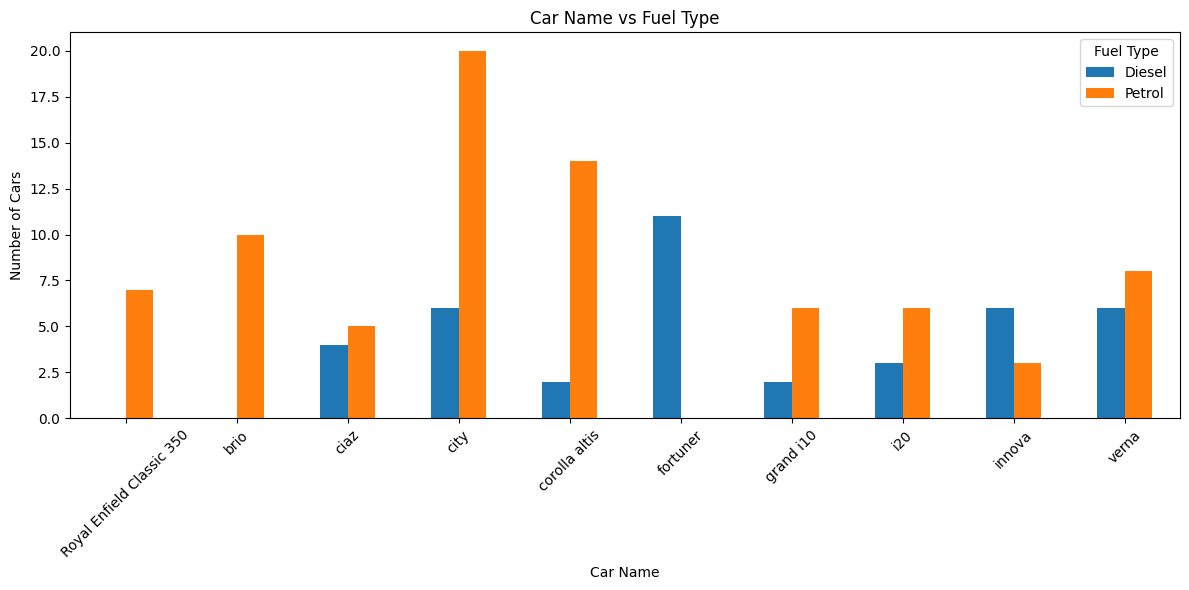

In [ ]:
# Take top 10 car names by count
top_cars = df["Car_Name"].value_counts().head(10).index
filtered_df = df[df["Car_Name"].isin(top_cars)]

# Create grouped bar chart
fuel_counts = filtered_df.groupby(["Car_Name", "Fuel_Type"]).size().unstack()

fuel_counts.plot(kind="bar", figsize=(12, 6))

plt.xlabel("Car Name")
plt.ylabel("Number of Cars")
plt.title("Car Name vs Fuel Type")
plt.xticks(rotation=45)
plt.legend(title="Fuel Type")
plt.tight_layout()
plt.show()